<h1>Churn Modelling and ANN</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importing Churn Modelling Dataset</h2>

In [2]:
data = pd.read_csv("C:/Users/rishd/OneDrive/Desktop/Data Cleaning DS/Neural Networks/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#inspecting the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 14)

<h2>Checking For Nulls and Duplicates</h2>

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#no null values found so no need for imputation

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
#no duplicates found so need to drop duplicates

<h2>Performing Descriptive Statistics on Categorical Columns</h2>

In [10]:
data.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [11]:
#'Surname' has high cardinality so dropping 'Surname' from dataframe as it seems irrelevant in predicting churn

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#dropping RowNumber and CustomerId as both are unique values for each customer and won't affect the prediction of churn

In [14]:
data.drop(columns=['Surname','RowNumber','CustomerId'],inplace=True)

In [15]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<h2>Visualizing Continuous Features in the Dataset</h2>

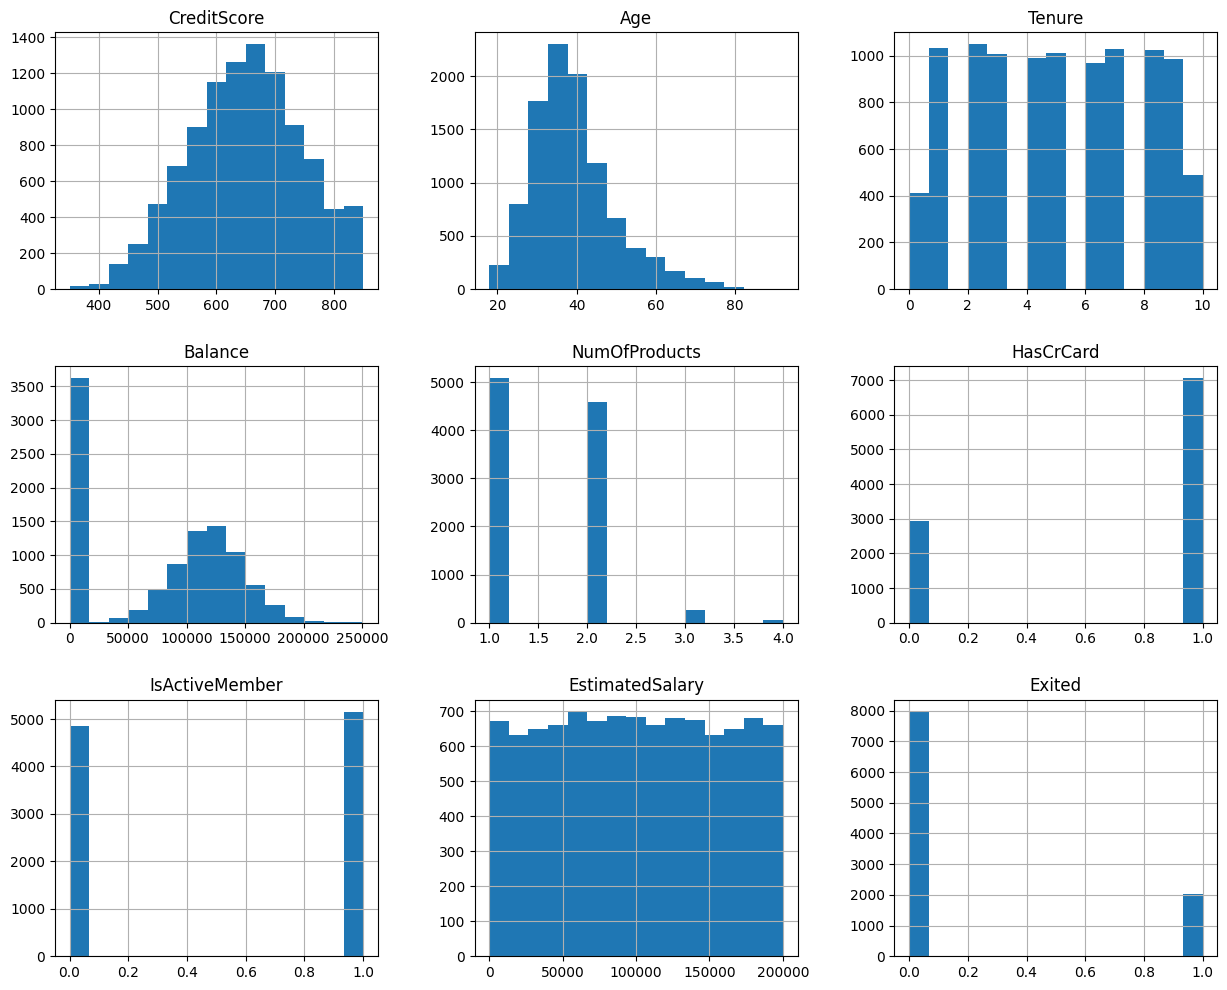

In [16]:
data.hist(figsize=(15,12),bins=15)
plt.show()

<h2>Feature Tranformations</h2>

In [17]:
#'CreditScore' and 'Age' seem to be normally distributed 

In [18]:
#Checking skewness of 'CreditScore' and 'Age'

In [19]:
data[['Age','CreditScore']].skew()

Age            1.011320
CreditScore   -0.071607
dtype: float64

<h4>'Age' Column</h4>

In [20]:
#performing log operation on 'Age' as it is positively skewed and can affect performance of ANN 

In [21]:
old_age = data['Age']
data['Age']=np.log(data['Age'])

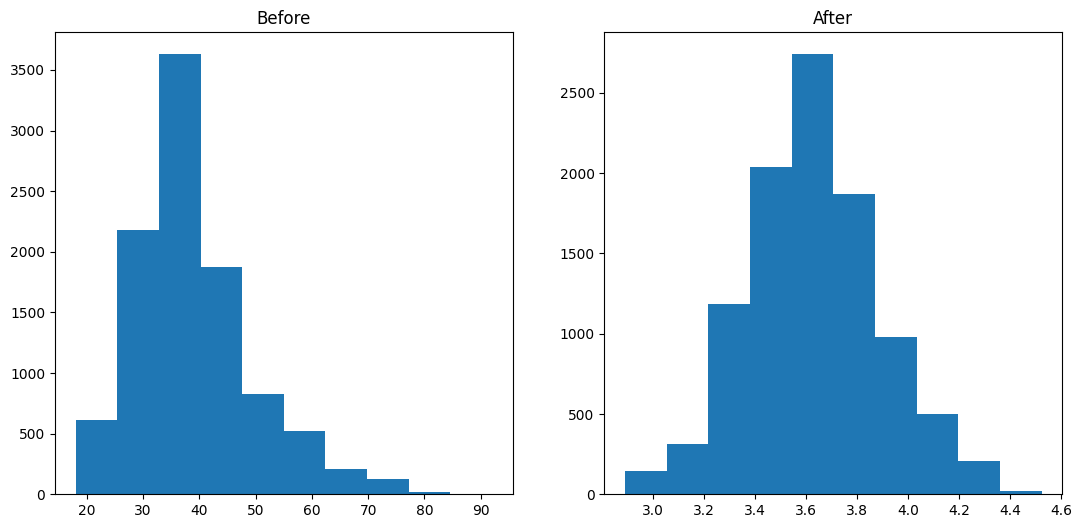

In [22]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.hist(old_age)
plt.title("Before")

plt.subplot(1,2,2)
plt.hist(data['Age'])
plt.title("After")
plt.show()

In [23]:
#we can see that 'Age' is now normally distributed

<h4>'Balance' Column</h4>

In [24]:
#Creating a new feature by grouping 'Balance' = 0 and 'Balance' > 0 separately for ML model to not be swayed by an imbalanced class

In [25]:
conditions = [(data['Balance']==0),(data['Balance']>0)]
choices = ["Zero Balance","More than Zero Balance"]

In [26]:
data['Account_Balance'] = np.select(conditions,choices,default='Other')

In [27]:
data.drop(columns = 'Balance',inplace=True)

In [28]:
data

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Account_Balance
0,619,France,Female,3.737670,2,1,1,1,101348.88,1,Zero Balance
1,608,Spain,Female,3.713572,1,1,0,1,112542.58,0,More than Zero Balance
2,502,France,Female,3.737670,8,3,1,0,113931.57,1,More than Zero Balance
3,699,France,Female,3.663562,1,2,0,0,93826.63,0,Zero Balance
4,850,Spain,Female,3.761200,2,1,1,1,79084.10,0,More than Zero Balance
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,2,1,0,96270.64,0,Zero Balance
9996,516,France,Male,3.555348,10,1,1,1,101699.77,0,More than Zero Balance
9997,709,France,Female,3.583519,7,1,0,1,42085.58,1,Zero Balance
9998,772,Germany,Male,3.737670,3,2,1,0,92888.52,1,More than Zero Balance


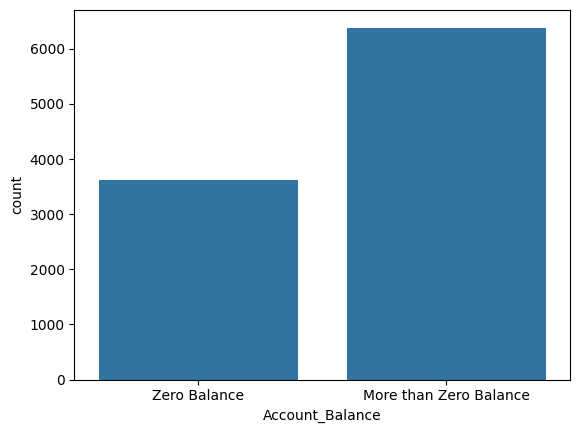

In [29]:
sns.countplot(x='Account_Balance',data=data)
plt.show()

<h4>'NumOfProducts' Column</h4>

In [30]:
#creating a new feature from 'NumOfProducts' by grouping into 1,2, >2 because more values on 1,2 products and less on values > 2
#the aim is to make the feature values more balanced so that product counts 1 & 2 do not over power the model prediction

In [31]:
conditions = [(data['NumOfProducts']==1),(data['NumOfProducts']==2),(data['NumOfProducts']>2)]
choices = ["One Product","Two Products","More than 2 Products"]

In [32]:
data['Total_Products'] = np.select(conditions,choices,default='Other')

In [33]:
data.drop(columns = 'NumOfProducts',inplace=True)

In [34]:
data

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Account_Balance,Total_Products
0,619,France,Female,3.737670,2,1,1,101348.88,1,Zero Balance,One Product
1,608,Spain,Female,3.713572,1,0,1,112542.58,0,More than Zero Balance,One Product
2,502,France,Female,3.737670,8,1,0,113931.57,1,More than Zero Balance,More than 2 Products
3,699,France,Female,3.663562,1,0,0,93826.63,0,Zero Balance,Two Products
4,850,Spain,Female,3.761200,2,1,1,79084.10,0,More than Zero Balance,One Product
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,1,0,96270.64,0,Zero Balance,Two Products
9996,516,France,Male,3.555348,10,1,1,101699.77,0,More than Zero Balance,One Product
9997,709,France,Female,3.583519,7,0,1,42085.58,1,Zero Balance,One Product
9998,772,Germany,Male,3.737670,3,1,0,92888.52,1,More than Zero Balance,Two Products


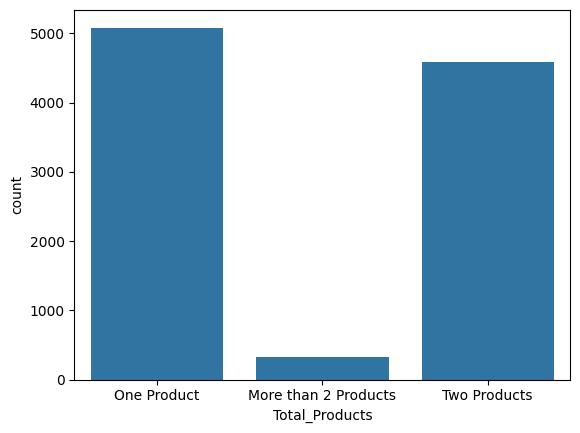

In [35]:
sns.countplot(x='Total_Products',data=data)
plt.show()

<h4>Performing One-hot encoding on Categorical Features</h4>

In [36]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Account_Balance,Total_Products
0,619,France,Female,3.737670,2,1,1,101348.88,1,Zero Balance,One Product
1,608,Spain,Female,3.713572,1,0,1,112542.58,0,More than Zero Balance,One Product
2,502,France,Female,3.737670,8,1,0,113931.57,1,More than Zero Balance,More than 2 Products
3,699,France,Female,3.663562,1,0,0,93826.63,0,Zero Balance,Two Products
4,850,Spain,Female,3.761200,2,1,1,79084.10,0,More than Zero Balance,One Product


In [37]:
cat_cols = ['Geography','Account_Balance','Total_Products']

In [38]:
data = pd.get_dummies(columns=cat_cols,data=data,dtype=int)

In [39]:
#Gender :- Male : 1 , Female :0

In [40]:
data['Gender']=data['Gender'].replace({"Male":1,"Female":0})

C:\Users\rishd\AppData\Local\Temp\ipykernel_18124\1065707334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']=data['Gender'].replace({"Male":1,"Female":0})


In [41]:
data

,CreditScore,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Account_Balance_More than Zero Balance,Account_Balance_Zero Balance,Total_Products_More than 2 Products,Total_Products_One Product,Total_Products_Two Products
0,619,0,3.737670,2,1,1,101348.88,1,1,0,0,0,1,0,1,0
1,608,0,3.713572,1,0,1,112542.58,0,0,0,1,1,0,0,1,0
2,502,0,3.737670,8,1,0,113931.57,1,1,0,0,1,0,1,0,0
3,699,0,3.663562,1,0,0,93826.63,0,1,0,0,0,1,0,0,1
4,850,0,3.761200,2,1,1,79084.10,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,3.663562,5,1,0,96270.64,0,1,0,0,0,1,0,0,1
9996,516,1,3.555348,10,1,1,101699.77,0,1,0,0,1,0,0,1,0
9997,709,0,3.583519,7,0,1,42085.58,1,1,0,0,0,1,0,1,0
9998,772,1,3.737670,3,1,0,92888.52,1,0,1,0,1,0,0,0,1


<h2>Determining Input X and Output y</h2>

In [42]:
y = data['Exited']

In [43]:
X = data.drop(columns=['Exited'])

In [44]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [45]:
y.shape

(10000,)

In [46]:
X

,CreditScore,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Account_Balance_More than Zero Balance,Account_Balance_Zero Balance,Total_Products_More than 2 Products,Total_Products_One Product,Total_Products_Two Products
0,619,0,3.737670,2,1,1,101348.88,1,0,0,0,1,0,1,0
1,608,0,3.713572,1,0,1,112542.58,0,0,1,1,0,0,1,0
2,502,0,3.737670,8,1,0,113931.57,1,0,0,1,0,1,0,0
3,699,0,3.663562,1,0,0,93826.63,1,0,0,0,1,0,0,1
4,850,0,3.761200,2,1,1,79084.10,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,3.663562,5,1,0,96270.64,1,0,0,0,1,0,0,1
9996,516,1,3.555348,10,1,1,101699.77,1,0,0,1,0,0,1,0
9997,709,0,3.583519,7,0,1,42085.58,1,0,0,0,1,0,1,0
9998,772,1,3.737670,3,1,0,92888.52,0,1,0,1,0,0,0,1


In [47]:
X.shape

(10000, 15)

<h2>Splitting X and y into Train and Test Data</h2>

In [48]:
X = X.to_numpy()

In [49]:
y = y.to_numpy()

In [50]:
# returns a 1-D numpy array with 10000 values in random order
idx = np.random.permutation(len(X))

# 80% for training
split = int(0.8 * len(X))             #splits into 8000 values

# Split indices
train_idx = idx[:split]          #returns a 1-D array with first 8000 entries
test_idx = idx[split:]            #returns remaining 2000 

# Split X and y
X_train = X[train_idx]         # returns randomnly selected 8000 values
X_test  = X[test_idx]              #returns randomly selected 2000 values

y_train = y[train_idx]
y_test  = y[test_idx]

<h2>Scaling the data using mean-std scaling</h2>

In [51]:
#we scale the X and y data so that no one variable dominates the other 

In [52]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_test.mean()) / X_test.std()

<h2>Implementing ANN binary classification with single layer perceptron</h2>

In [53]:
def sigmoid(h):       # h is hypothesis 
    return 1/(1+np.exp(-h))


def cross_entropy(y,p_hat):         #p_hat is single probability
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*(1-y)*np.log(1-p_hat))


def accuracy(y,y_hat):
    return np.mean(y==y_hat)    

In [64]:
class ANN_churn():
    def __init__(self,thresh=0.30):
        self.thresh = thresh
        self.W = None
        self.b = None

    def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=True):
        epochs = int(epochs)
        N,D = X.shape

        #Stochastic Gradient Descent
        #Random Initialization of Weights and Biases

        self.W = np.random.randn(D)
        self.b = np.random.randn(1)

        #build Containr for Losses
        J = np.zeros(epochs)
        
        #SGD Begin

        for epoch in range(epochs):
            p_hat = self.__forward__(X)          #push data through the network
            J[epoch] = cross_entropy(y,p_hat)

            #Weight Update Rules
            
            self.W -= eta*(1/N)*X.T@(p_hat-y)

            self.b -= eta*(1/N)*np.sum(p_hat-y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            #plt.xlabel("$\matchcal{J}$")
            plt.title("Training Curve")


    def __forward__(self,X):
        return sigmoid(X@self.W+self.b)


    def predict(self,X):
        return (self.__forward__(X)>=self.thresh).astype(np.int32)
     
        

In [67]:
def main():
    

    ANN_churn = ANN_churn()
    ANN_churn.fit(X_train_scaled,y_train,eta=1e-3,epochs=8e3)
    y_hat = ANN_churn.predict(X_train_scaled)
    y_hat_test = ANN_churn.predict(X_test_scaled)

    print(f"Training Accuracy: {accuracy(y_train,y_hat): 0.4f}")
    print(f"Test Accuracy: {accuracy(y_test,y_hat_test): 0.4f}")
    #print(log_reg.W,log_reg.b)

    print(set(y_hat))
    print(set(y_hat_test))

    plt.figure(figsize=(10,7))
    y_actu = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_hat_test, name='Predicted')
    cm = pd.crosstab(y_actu, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




Training Accuracy:  0.7219
Test Accuracy:  0.7160
{np.int32(0), np.int32(1)}
{np.int32(0), np.int32(1)}


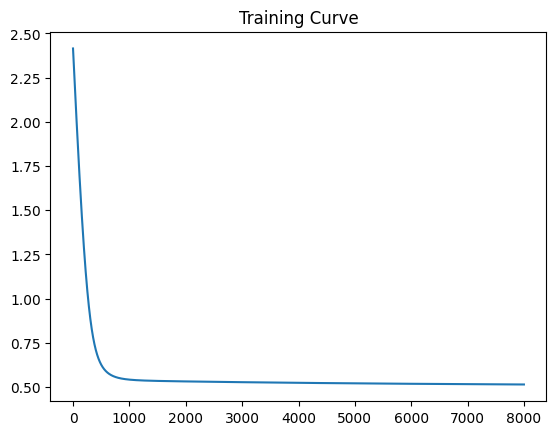

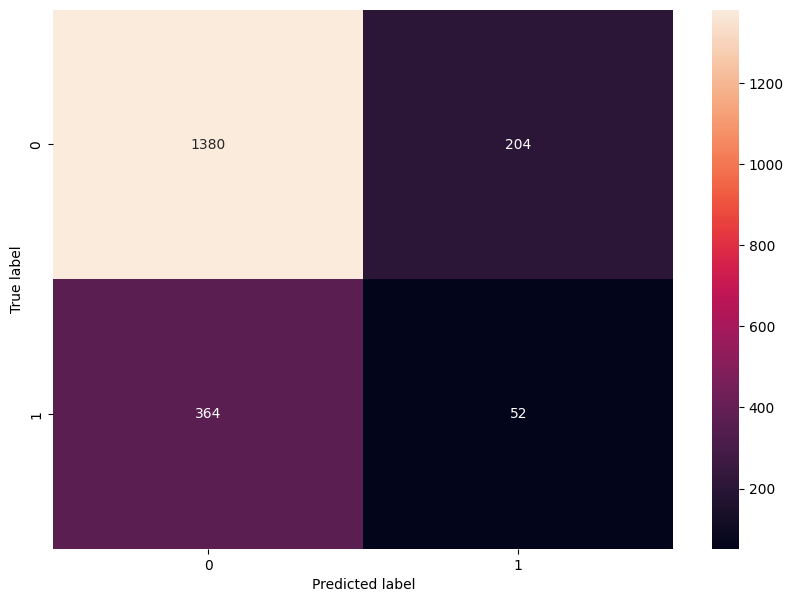

In [68]:
if __name__ =="__main__":
    main()